# `local_thickness`
This replaces each voxel with the radius of the largest sphere that would overlap it.  This is different than the distance transform which is the radius of the largest sphere which could be centered on it.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
ps.visualization.set_mpl_style()

The arguments and their defaults are:

In [2]:
import inspect
inspect.signature(ps.filters.local_thickness)

<Signature (im, sizes=25, mode='hybrid', divs=1)>

## `im`
The image can be either 2D or 3D:

  0%|          | 0/25 [00:00<?, ?it/s]

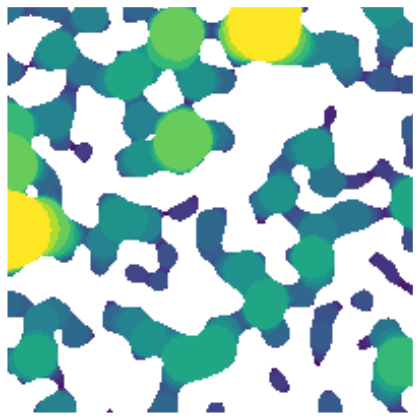

In [3]:
im = ps.generators.blobs([200, 200])
lt = ps.filters.local_thickness(im=im)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(lt/im, origin='lower', interpolation='none')
ax.axis(False);

## `sizes`
The number of bins to use when drawing spheres, or the actual bins to use.  The default is 25 which means that 25 logarithmically spaced sizes are used from the maximum of the distance transform down to 1.  If an array or list of actual sizes is provided these are used directly, which can be useful for generating custom bins, for instance with linear or bimodal spacing.

  0%|          | 0/5 [00:00<?, ?it/s]

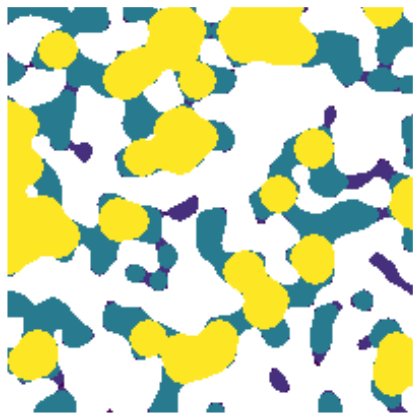

In [4]:
lt = ps.filters.local_thickness(im=im, sizes=5)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(lt/im, origin='lower', interpolation='none')
ax.axis(False);

## `mode`
This controls which method is used.  The default is a 'hybrid' which uses a the threshold of a distance transform to perform an erosion, then fft-based dilation to generate spheres.  Other options are `dt` which uses a distance transform for both steps, or 'mio' which uses morphological operations for both steps. The selected method will affect the speed, but this depends on the computer being used.  All results should be exactly the same, and this is ensured in a unit test:

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

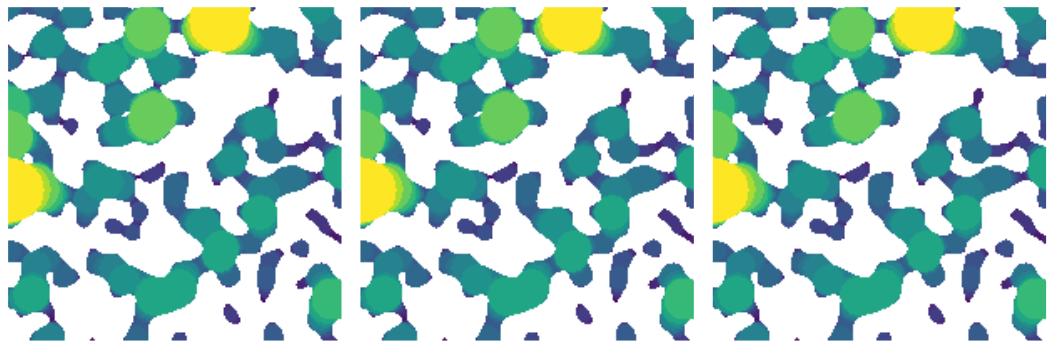

In [5]:
lt1 = ps.filters.local_thickness(im=im, mode='hybrid')
lt2 = ps.filters.local_thickness(im=im, mode='dt')
lt3 = ps.filters.local_thickness(im=im, mode='mio')
fig, ax = plt.subplots(1, 3, figsize=[15, 5])
ax[0].imshow(lt1/im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(lt2/im, origin='lower', interpolation='none')
ax[1].axis(False)
ax[2].imshow(lt3/im, origin='lower', interpolation='none')
ax[2].axis(False);

In [6]:
print("All elements in the hybrid and dt modes are equal:", np.all(lt1 == lt2))
print("All elements in the hybrid and mio modes are equal:", np.all(lt1 == lt3))

All elements in the hybrid and dt modes are equal: True
All elements in the hybrid and mio modes are equal: True


## `divs`
This indicates if the image should be divided into chunks and processed in parallel.  An integer indicates equal chunks in all directions, or a list can be given with the number of chunks to create in each direction.  Dask is used behind the scenes to apply the filters to each chunk.  The number of cores used is set in ``porespy.settings``, with the default being all cores.

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

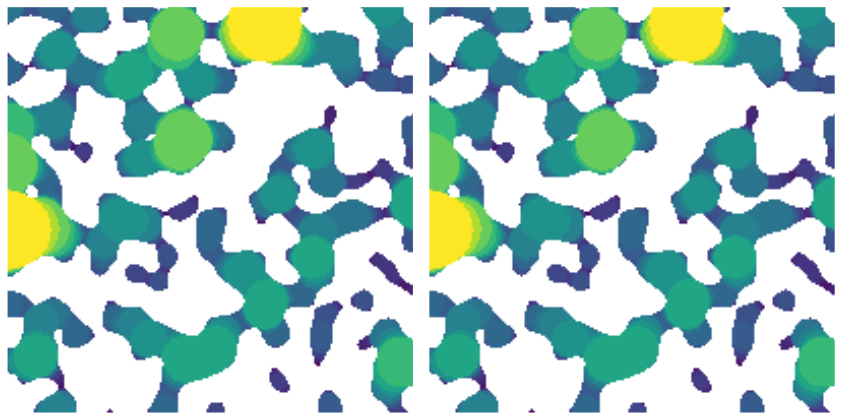

In [7]:
lt1 = ps.filters.local_thickness(im=im, divs=2)
lt2 = ps.filters.local_thickness(im=im, divs=[2, 3])
fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(lt1/im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(lt2/im, origin='lower', interpolation='none')
ax[1].axis(False);

In [8]:
print("Results are identical regardless of chunk size", np.all(lt1 == lt2))

Results are identical regardless of chunk size True
